灵⻓类动物的视觉系统接受了⼤量的感官输⼊，这些感官输⼊远远超过了⼤脑能够完全处理的程度。然⽽，
并⾮所有刺激的影响都是相等的。意识的聚集和专注使灵⻓类动物能够在复杂的视觉环境中将注意⼒引向感
兴趣的物体，例如猎物和天敌。只关注⼀⼩部分信息的能⼒对进化更加有意义，使⼈类得以⽣存和成功。

⾃19世纪以来，科学家们⼀直致⼒于研究认知神经科学领域的注意⼒。本章的很多章节将涉及到⼀些研究。

⾸先回顾⼀个经典注意⼒框架，解释如何在视觉场景中展开注意⼒。受此框架中的注意⼒提⽰（attentioncues）
的启发，我们将设计能够利⽤这些注意⼒提⽰的模型。1964年的Nadaraya-Waston核回归（kernelregression）
正是具有 注意⼒机制（attention mechanism）的机器学习的简单演⽰。

然后继续介绍的是注意⼒函数，它们在深度学习的注意⼒模型设计中被⼴泛使⽤。具体来说，我们将展⽰如何
使⽤这些函数来设计Bahdanau注意⼒。Bahdanau注意⼒是深度学习中的具有突破性价值的注意⼒模型，它
双向对⻬并且可以微分。

最后将描述仅仅基于注意⼒机制的Transformer架构，该架构中使⽤了多头注意⼒（multi-head attention）和
⾃注意⼒（self-attention）。⾃2017年横空出世，Transformer⼀直都普遍存在于现代的深度学习应⽤中，例
如语⾔、视觉、语⾳和强化学习领域。

## 注意力提示
感谢读者对本书的关注，因为读者的注意⼒是⼀种稀缺的资源：此刻读者正在阅读本书（⽽忽略了其他的书），
因此读者的注意⼒是⽤机会成本（与⾦钱类似）来⽀付的。为了确保读者现在投⼊的注意⼒是值得的，作者
们尽全⼒（全部的注意⼒）创作⼀本好书。

⾃经济学研究稀缺资源分配以来，⼈们正处在“注意⼒经济”时代，即⼈类的注意⼒被视为可以交换的、有
限的、有价值的且稀缺的商品。许多商业模式也被开发出来去利⽤这⼀点：在⾳乐或视频流媒体服务上，⼈
们要么消耗注意⼒在⼴告上，要么付钱来隐藏⼴告；为了在⽹络游戏世界的成⻓，⼈们要么消耗注意⼒在游
戏战⽃中，从⽽帮助吸引新的玩家，要么付钱⽴即变得强⼤。总之，注意⼒不是免费的。

注意⼒是稀缺的，⽽环境中的⼲扰注意⼒的信息却并不少。⽐如⼈类的视觉神经系统⼤约每秒收到10 8 位的
信息，这远远超过了⼤脑能够完全处理的⽔平。幸运的是，⼈类的祖先已经从经验（也称为数据）中认识到
“并⾮感官的所有输⼊都是⼀样的”。在整个⼈类历史中，这种只将注意⼒引向感兴趣的⼀⼩部分信息的能⼒，
使⼈类的⼤脑能够更明智地分配资源来⽣存、成⻓和社交，例如发现天敌、找寻⻝物和伴侣。
### 生物学中的注意力提示
注意⼒是如何应⽤于视觉世界中的呢？这要从当今⼗分普及的双组件（two-component）的框架开始讲起：
这个框架的出现可以追溯到19世纪90年代的威廉·詹姆斯，他被认为是“美国⼼理学之⽗”(James, 2007)。在
这个框架中，受试者基于⾮⾃主性提⽰和⾃主性提⽰有选择地引导注意⼒的焦点。

⾮⾃主性提⽰是基于环境中物体的突出性和易⻅性。想象⼀下，假如我们⾯前有五个物品：⼀份报纸、⼀篇
研究论⽂、⼀杯咖啡、⼀本笔记本和⼀本书，就像 图10.1.1。所有纸制品都是⿊⽩印刷的，但咖啡杯是红⾊
的。换句话说，这个咖啡杯在这种视觉环境中是突出和显眼的，不由⾃主地引起⼈们的注意。所以我们会把
视⼒最敏锐的地⽅放到咖啡上，如 图10.1.1所⽰。
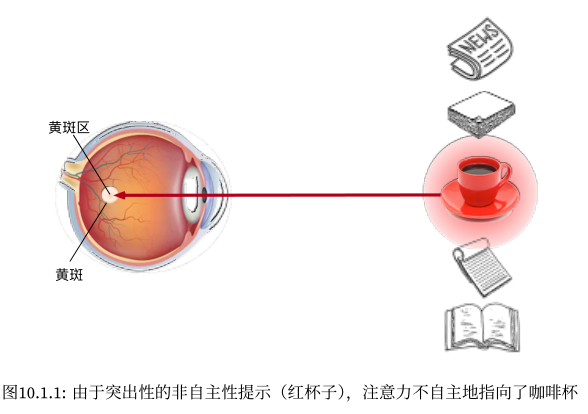
喝咖啡后，我们会变得兴奋并想读书，所以转过头，重新聚焦眼睛，然后看看书，就像 图10.1.2中描述那样。
与 图10.1.1中由于突出性导致的选择不同，此时选择书是受到了认知和意识的控制，因此注意⼒在基于⾃主
性提⽰去辅助选择时将更为谨慎。受试者的主观意愿推动，选择的⼒量也就更强⼤。
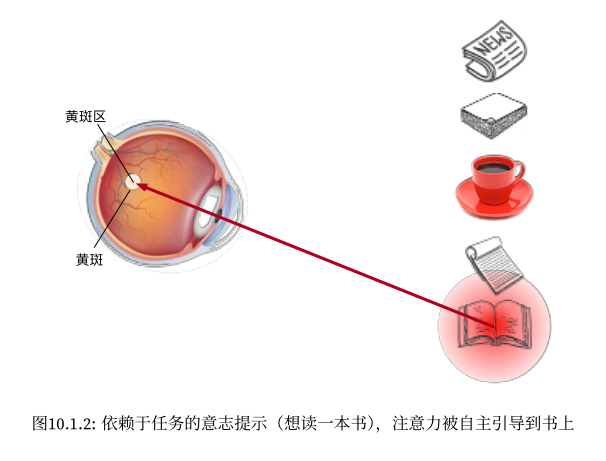
### 查询、键和值
⾃主性的与⾮⾃主性的注意⼒提⽰解释了⼈类的注意⼒的⽅式，下⾯来看看如何通过这两种注意⼒提⽰，⽤
神经⽹络来设计注意⼒机制的框架，

⾸先，考虑⼀个相对简单的状况，即只使⽤⾮⾃主性提⽰。要想将选择偏向于感官输⼊，则可以简单地使⽤
参数化的全连接层，甚⾄是⾮参数化的最⼤汇聚层或平均汇聚层。

因此，“是否包含⾃主性提⽰”将注意⼒机制与全连接层或汇聚层区别开来。在注意⼒机制的背景下，⾃主性
提⽰被称为查询（query）。给定任何查询，注意⼒机制通过注意⼒汇聚（attention pooling）将选择引导⾄
感官输⼊（sensory inputs，例如中间特征表⽰）。在注意⼒机制中，这些感官输⼊被称为值（value）。更通
俗的解释，每个值都与⼀个键（key）配对，这可以想象为感官输⼊的⾮⾃主提⽰。如 图10.1.3所⽰，可以通
过设计注意⼒汇聚的⽅式，便于给定的查询（⾃主性提⽰）与键（⾮⾃主性提⽰）进⾏匹配，这将引导得出
最匹配的值（感官输⼊）。
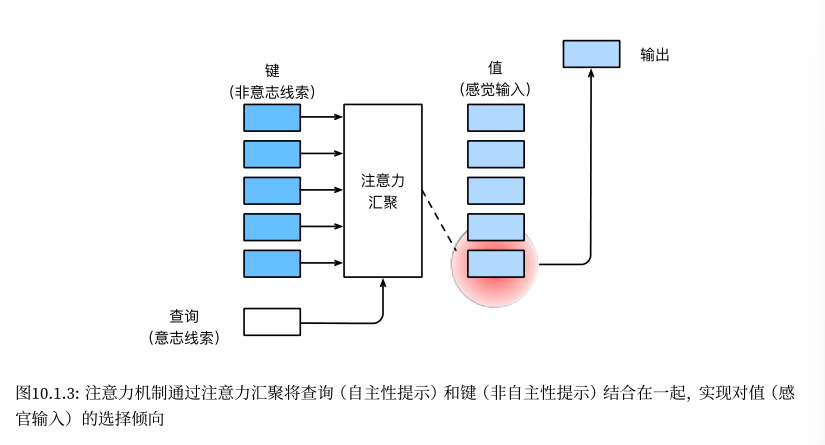
鉴于上⾯所提框架在 图10.1.3中的主导地位，因此这个框架下的模型将成为本章的中⼼。然⽽，注意⼒机制
的设计有许多替代⽅案。例如可以设计⼀个不可微的注意⼒模型，该模型可以使⽤强化学习⽅法 (Mnih et al.,
2014)进⾏训练。
### 注意力的可视化
平均汇聚层可以被视为输⼊的加权平均值，其中各输⼊的权重是⼀样的。实际上，注意⼒汇聚得到的是加权
平均的总和值，其中权重是在给定的查询和不同的键之间计算得出的。

In [ ]:
import torch
from d2l import torch as d2l

为了可视化注意⼒权重，需要定义⼀个show_heatmaps函数。其输⼊matrices的形状是（要显⽰的⾏数，要显
⽰的列数，查询的数⽬，键的数⽬）。

In [ ]:
# d2l.show_heatmaps
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

下⾯使⽤⼀个简单的例⼦进⾏演⽰。在本例⼦中，仅当查询和键相同时，注意⼒权重为1，否则为0。

In [ ]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

后⾯的章节内容将经常调⽤show_heatmaps函数来显⽰注意⼒权重。
### ⼩结

    • ⼈类的注意⼒是有限的、有价值和稀缺的资源。
    • 受试者使⽤⾮⾃主性和⾃主性提⽰有选择性地引导注意⼒。前者基于突出性，后者则依赖于意识。
    • 注意⼒机制与全连接层或者汇聚层的区别源于增加的⾃主提⽰。
    • 由于包含了⾃主性提⽰，注意⼒机制与全连接的层或汇聚层不同。
    • 注意⼒机制通过注意⼒汇聚使选择偏向于值（感官输⼊），其中包含查询（⾃主性提⽰）和键（⾮⾃主性提⽰）。键和值是成对的。
    • 可视化查询和键之间的注意⼒权重是可⾏的。

## 注意力汇聚: Nadaraya-Watson 核回归
上节介绍了框架下的注意⼒机制的主要成分 图10.1.3：查询（⾃主提⽰）和键（⾮⾃主提⽰）之间的交互形成
了注意⼒汇聚；注意⼒汇聚有选择地聚合了值（感官输⼊）以⽣成最终的输出。本节将介绍注意⼒汇聚的更
多细节，以便从宏观上了解注意⼒机制在实践中的运作⽅式。具体来说，1964年提出的Nadaraya-Watson核
回归模型是⼀个简单但完整的例⼦，可以⽤于演⽰具有注意⼒机制的机器学习。

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

### 生成数据集
简单起⻅，考虑下⾯这个回归问题：给定的成对的“输⼊－输出”数据集{(x 1 ,y 1 ),...,(x n ,y n )}，如何学习f来
预测任意新输⼊x的输出ˆ y = f(x)？

根据下⾯的⾮线性函数⽣成⼀个⼈⼯数据集，其中加⼊的噪声项为ϵ：
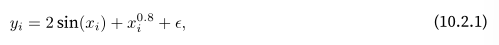
其中ϵ服从均值为0和标准差为0.5的正态分布。在这⾥⽣成了50个训练样本和50个测试样本。为了更好地可视
化之后的注意⼒模式，需要将训练样本进⾏排序。

In [ ]:
n_train = 50 # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5) # 排序后的训练样本

In [ ]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,)) # 训练样本的输出
x_test = torch.arange(0, 5, 0.1) # 测试样本
y_truth = f(x_test) # 测试样本的真实输出
n_test = len(x_test) # 测试样本数
n_test

下⾯的函数将绘制所有的训练样本（样本由圆圈表⽰），不带噪声项的真实数据⽣成函数f（标记为“Truth”），
以及学习得到的预测函数（标记为“Pred”）。

In [ ]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)

### 平均汇聚
先使⽤最简单的估计器来解决回归问题。基于平均汇聚来计算所有训练样本输出值的平均值：
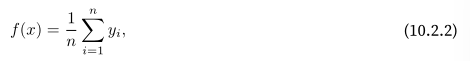
如下图所⽰，这个估计器确实不够聪明。真实函数f（“Truth”）和预测函数（“Pred”）相差很⼤。

In [ ]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

### 非参数注意力汇聚
显然，平均汇聚忽略了输⼊x i 。于是Nadaraya (Nadaraya, 1964)和 Watson (Watson, 1964)提出了⼀个更好的
想法，根据输⼊的位置对输出y i 进⾏加权：
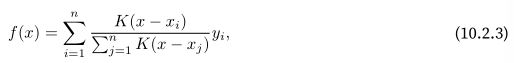
其中K是核（kernel）。公式(10.2.3)所描述的估计器被称为Nadaraya-Watson核回归（Nadaraya-Watsonkernel
regression）。这⾥不会深⼊讨论核函数的细节，但受此启发，我们可以从 图10.1.3中的注意⼒机制框架的⻆
度重写 (10.2.3)，成为⼀个更加通⽤的注意⼒汇聚（attention pooling）公式：
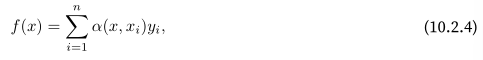
其中x是查询，(x i ,y i )是键值对。⽐较 (10.2.4)和 (10.2.2)，注意⼒汇聚是y i 的加权平均。将查询x和键x i 之间的
关系建模为 注意⼒权重（attention weight）α(x,x i )，如 (10.2.4)所⽰，这个权重将被分配给每⼀个对应值y i 。
对于任何查询，模型在所有键值对注意⼒权重都是⼀个有效的概率分布：它们是⾮负的，并且总和为1。

为了更好地理解注意⼒汇聚，下⾯考虑⼀个⾼斯核（Gaussian kernel），其定义为：
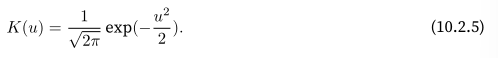
将⾼斯核代⼊ (10.2.4)和 (10.2.3)可以得到：
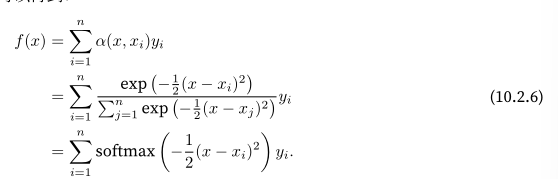
在 (10.2.6)中，如果⼀个键x i 越是接近给定的查询x，那么分配给这个键对应值y i 的注意⼒权重就会越⼤，也
就“获得了更多的注意⼒”。

值得注意的是，Nadaraya-Watson核回归是⼀个⾮参数模型。因此，(10.2.6)是 ⾮参数的注意⼒汇聚
（nonparametric attention pooling）模型。接下来，我们将基于这个⾮参数的注意⼒汇聚模型来绘制预测
结果。从绘制的结果会发现新的模型预测线是平滑的，并且⽐平均汇聚的预测更接近真实。

In [ ]:
# X_repeat的形状:(n_test, n_train)
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attnetion_weights的形状：（n_test, n_train）
# 每一行都包含着要给定的每个查询的值(y_train) 之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

现在来观察注意⼒的权重。这⾥测试数据的输⼊相当于查询，⽽训练数据的输⼊相当于键。因为两个输⼊都
是经过排序的，因此由观察可知“查询-键”对越接近，注意⼒汇聚的注意⼒权重就越⾼。

In [ ]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

### 带参数注意力汇聚
⾮参数的Nadaraya-Watson核回归具有⼀致性（consistency）的优点：如果有⾜够的数据，此模型会收敛到
最优结果。尽管如此，我们还是可以轻松地将可学习的参数集成到注意⼒汇聚中。

例如，与 (10.2.6)略有不同，在下⾯的查询x和键x i 之间的距离乘以可学习参数w：
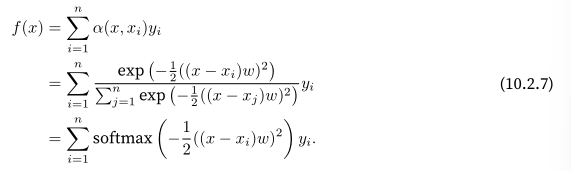
本节的余下部分将通过训练这个模型 (10.2.7)来学习注意⼒汇聚的参数。

#### 批量矩阵乘法
为了更有效地计算⼩批量数据的注意⼒，我们可以利⽤深度学习开发框架中提供的批量矩阵乘法。

假设第⼀个⼩批量数据包含n个矩阵X 1 ,...,X n ，形状为a × b，第⼆个⼩批量包含n个矩阵Y 1 ,...,Y n ，形状
为b × c。它们的批量矩阵乘法得到n个矩阵 X 1 Y 1 ,...,X n Y n ，形状为a × c。因此，假定两个张量的形状分别
是(n,a,b)和(n,b,c)，它们的批量矩阵乘法输出的形状为(n,a,c)。

In [3]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape

torch.Size([2, 1, 6])

在注意⼒机制的背景中，我们可以使⽤⼩批量矩阵乘法来计算⼩批量数据中的加权平均值。

In [ ]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
# weights.unsqueeze(1)=>(2, 1, 10) values.unsqueeze(-1)=>(2, 10, 1)
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

#### 定义模型
基于(10.2.7)中的带参数的注意⼒汇聚，使⽤⼩批量矩阵乘法，定义Nadaraya-Watson核回归的带参数版本为：

In [ ]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))
    
    def forward(self, queries, keys, values):
        # queries和attention_weights的形状为(查询个数，"键-值"对个数)
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        self.attention_weights = nn.functional.softmax(
            -((queries - keys)*self.w)**2 / 2, dim=1)
        # values的形状为(查询个数，"键-值"对个数)
        return torch.bmm(self.attention_weights.unsqueeze(1),
                         values.unsqueeze(-1)).reshape(-1)

#### 训练
接下来，将训练数据集变换为键和值⽤于训练注意⼒模型。在带参数的注意⼒汇聚模型中，任何⼀个训练样
本的输⼊都会和除⾃⼰以外的所有训练样本的“键－值”对进⾏计算，从⽽得到其对应的预测输出。

In [ ]:
# X_tile的形状：(n_train, n_train), 每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))
# Y_tile的形状:(n_train, n_train),每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))
# keys的形状:(n_train, n_train-1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
# values的形状:(n_train, n_train-1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

训练带参数的注意⼒汇聚模型时，使⽤平⽅损失函数和随机梯度下降。

In [ ]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch+1, float(l.sum()))

如下所⽰，训练完带参数的注意⼒汇聚模型后可以发现：在尝试拟合带噪声的训练数据时，预测结果绘制的
线不如之前⾮参数模型的平滑。

In [ ]:
# keys的形状:(n_test, n_train), 每一行包含着相同的训练输入（例如，相同的键
keys = x_train.repeat((n_test, 1))
# value的形状:(n_test, n_train)
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

为什么新的模型更不平滑了呢？下⾯看⼀下输出结果的绘制图：与⾮参数的注意⼒汇聚模型相⽐，带参数的
模型加⼊可学习的参数后，曲线在注意⼒权重较⼤的区域变得更不平滑。

In [ ]:
d2l.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='train inputs',
                  ylabel='test  inputs')

#### ⼩结
    • Nadaraya-Watson核回归是具有注意⼒机制的机器学习范例。
    • Nadaraya-Watson核回归的注意⼒汇聚是对训练数据中输出的加权平均。从注意⼒的⻆度来看，分配给每个值的注意⼒权重取决于将值所对应的键和查询作为输⼊的函数。
    • 注意⼒汇聚可以分为⾮参数型和带参数型。